In [14]:
# As of Python 3.7, "Dict keeps insertion order" is the ruling.
# So please use Python 3.7 or later version.
import numpy as np
import gudhi
import scipy.spatial.distance

In [15]:
def matrix_reader(filename = 'test.txt'):
    text = open(filename, "r")
    array_list = []
    for line in text:
        array_list.append(list(map(float, line.split())))
    return np.array(array_list)  

def array_reader(filename = 'test.txt'):
    text = open(filename, "r")
    array_list = []
    for line in text:
        array_list.append(list(map(float, line.split())))
    return array_list

def oneline_array_reader(filename = 'test.txt'):
    text = open(filename, 'r')
    for line in text:
        res = list(map(float, line.split()))
    return res

In [16]:
def array_writer(array, filename = 'test.txt'):
    """
    The array is a numpy array or list of lists. 
    We write it into a txt file.
    filename is the name of the txt file.
    """
    with open(filename, 'w') as f:
        for row in array:
            for i, entry in enumerate(row):
                f.write("{} ".format(entry))
            f.write("\n")
    f.close() 

In [17]:
dir = '/Users/xiaoqi/sheaf/experiments/1e68'
filtration_list = np.arange(0.01,2.01, 0.01)
psl_l0 = []
psl_l1 = []
for idx in np.arange(1, 201):
    psl_l0.append(oneline_array_reader(dir+'/nc_p=0.2/psl_l0_nc_f={}.txt'.format(idx)))
    psl_l1.append(oneline_array_reader(dir+'/nc_p=0.2/psl_l1_nc_f={}.txt'.format(idx)))

In [18]:
min_psl_l0 = np.zeros(200)
betti_psl_l0 = np.zeros(200)
for i, eigvals in enumerate(psl_l0):
    if len(eigvals) == 0:
        min_psl_l0[i] = 0
        betti_psl_l0[i] = 0
    else:
        eigvals = np.array(eigvals) 
        if np.all(eigvals < 1e-5):
            min_psl_l0[i] = 0
            betti_psl_l0[i] = len(eigvals)
        else:
            min_psl_l0[i] = np.min(eigvals[eigvals > 1e-5])
            betti_psl_l0[i] = len(eigvals[eigvals <= 1e-5])

In [19]:
min_psl_l1 = np.zeros(200)
betti_psl_l1 = np.zeros(200)
for i, eigvals in enumerate(psl_l1):
    if len(eigvals) == 0:
        min_psl_l1[i] = 0
        betti_psl_l1[i] = 0
    else:
        eigvals = np.array(eigvals) 
        if np.all(eigvals < 1e-5):
            min_psl_l1[i] = 0
            betti_psl_l1[i] = len(eigvals)
        else:
            min_psl_l1[i] = np.min(eigvals[eigvals > 1e-5])
            betti_psl_l1[i] = len(eigvals[eigvals <= 1e-5])

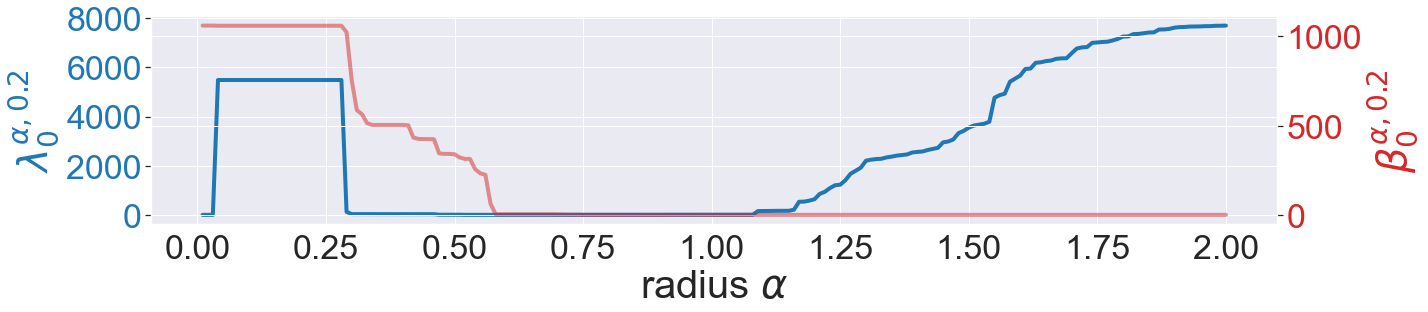

In [20]:
image_dir = '/Users/xiaoqi/sheaf/images/'
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid', rc={'figure.figsize':(20,4.5),
                                 'xtick.labelsize':'x-large',
                                 'ytick.labelsize':'x-large',
                                 'axes.labelsize': 25})
t = filtration_list

#data2 = naphthalene[0]

fig, ax1 = plt.subplots()

ax1.set_xlabel(r"radius $\alpha$", fontsize=40)
ax1.set_ylabel(r"$\lambda_0^{\alpha, 0.2}$", color='tab:blue', fontsize=40)
#ax1.set_yticks(np.arange(1,20,3))
ax1.plot(t, min_psl_l0, linewidth=4, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=34)
ax1.tick_params(axis='x', labelsize=34)
ax1.set_yticks(np.arange(0,10000,2000))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel(r"$\beta_0^{\alpha, 0.2}$", color='tab:red', fontsize=40)  # we already handled the x-label with ax1
#ax2.scatter(t[::2], data2[::2], color="none", edgecolor="red", marker='o', s=180)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=34)
ax2.plot(t, betti_psl_l0, linewidth=4,color='tab:red', alpha=0.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(image_dir+'psl_nc_1e68_p=0dot2_l0.png')
plt.show()

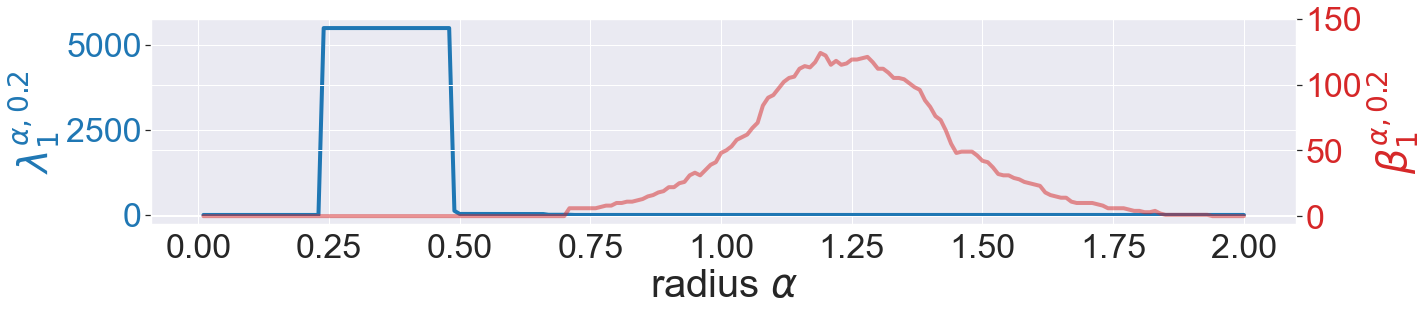

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid', rc={'figure.figsize':(20,4.5),
                                 'xtick.labelsize':'x-large',
                                 'ytick.labelsize':'x-large',
                                 'axes.labelsize': 25})
t = filtration_list

#data2 = naphthalene[0]

fig, ax1 = plt.subplots()

ax1.set_xlabel(r"radius $\alpha$", fontsize=40)
ax1.set_ylabel(r"$\lambda_1^{\alpha, 0.2}$", color='tab:blue', fontsize=40)
#ax1.set_yticks(np.arange(1,20,3))
ax1.plot(t, min_psl_l1, linewidth=4, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=34)
ax1.tick_params(axis='x', labelsize=34)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel(r"$\beta_1^{\alpha, 0.2}$", color='tab:red', fontsize=40)  # we already handled the x-label with ax1
#ax2.scatter(t[::2], data2[::2], color="none", edgecolor="red", marker='o', s=180)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=34)
ax2.plot(t, betti_psl_l1, linewidth=4,color='tab:red', alpha=0.5)
#ax2.set_ylim(bottom=-20)
ax2.set_yticks(np.arange(0,200, 50))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(image_dir+'psl_nc_1e68_p=0dot2_l1.png')
plt.show()

In [19]:
a = np.array([1,2,3,4,5,6])
a[a<3]

array([1, 2])